In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [24]:
data = pd.read_csv('drug200.csv')
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [25]:
data.duplicated().sum()

0

In [26]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [27]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [28]:
print('Blood Pressure : ', data.BP.unique())
print('Cholesterol    : ', data.Cholesterol.unique())
print('Drugs          : ', data.Drug.unique())

Blood Pressure :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol    :  ['HIGH' 'NORMAL']
Drugs          :  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


<AxesSubplot:xlabel='Drug', ylabel='count'>

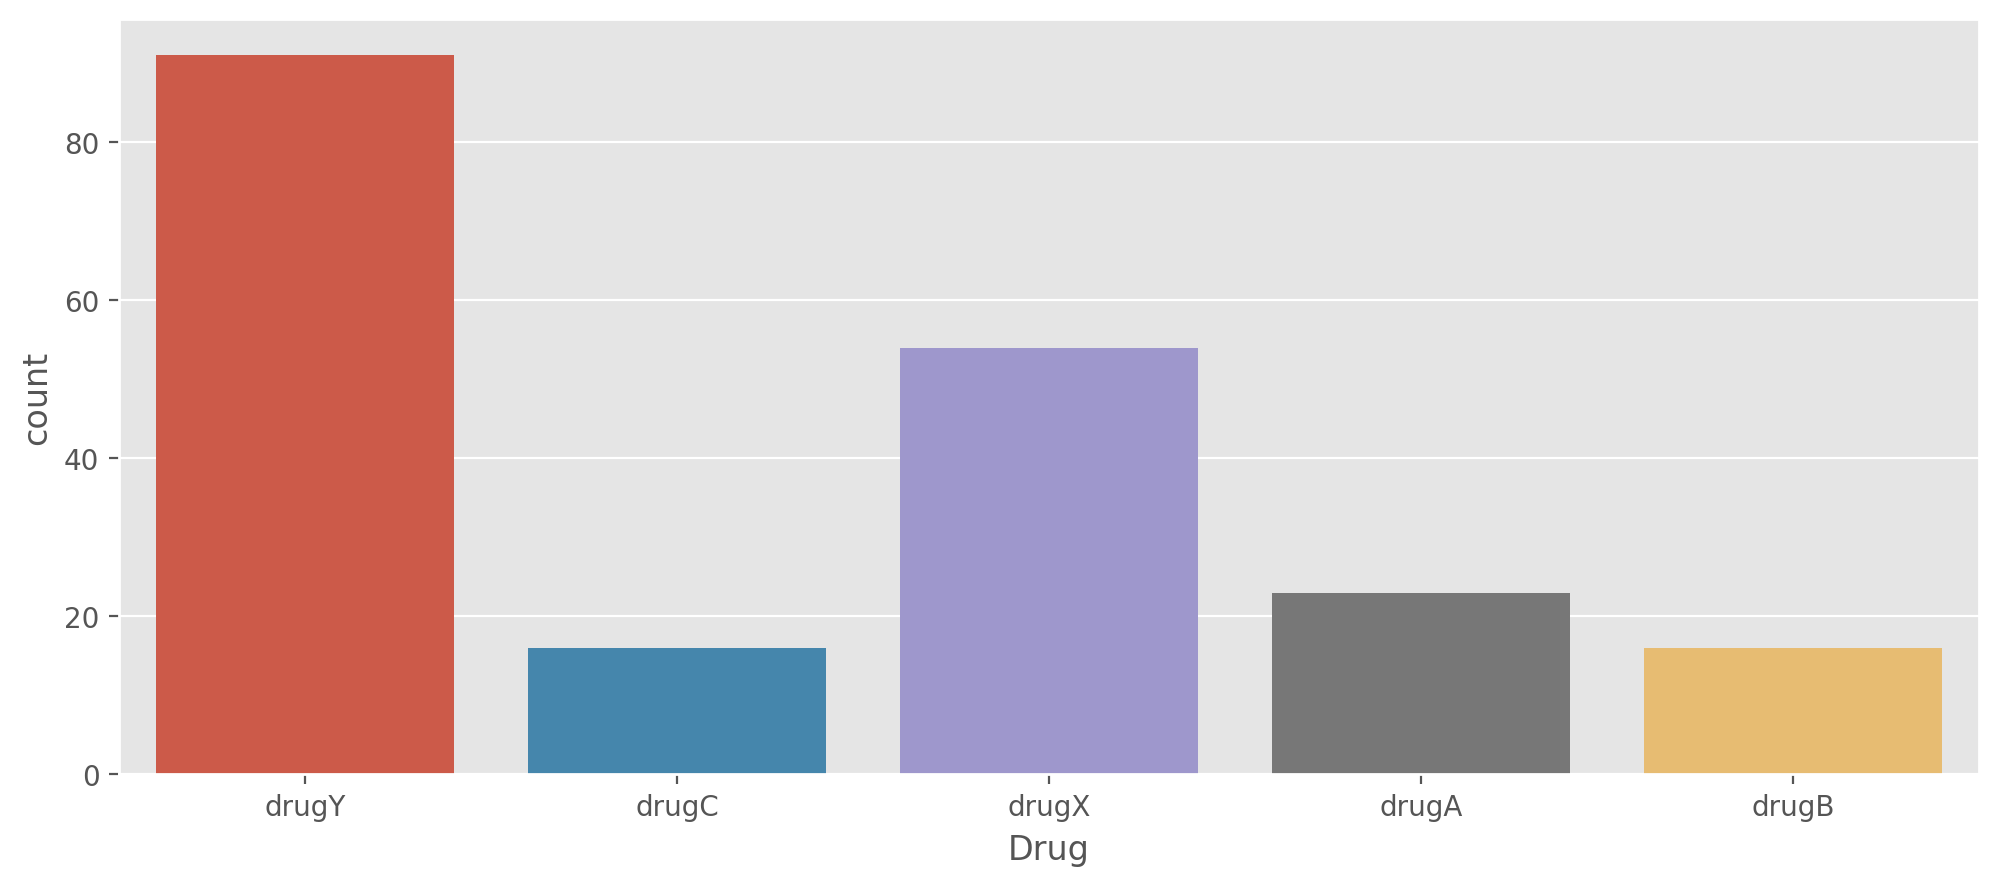

In [29]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug)

<AxesSubplot:xlabel='Drug', ylabel='Age'>

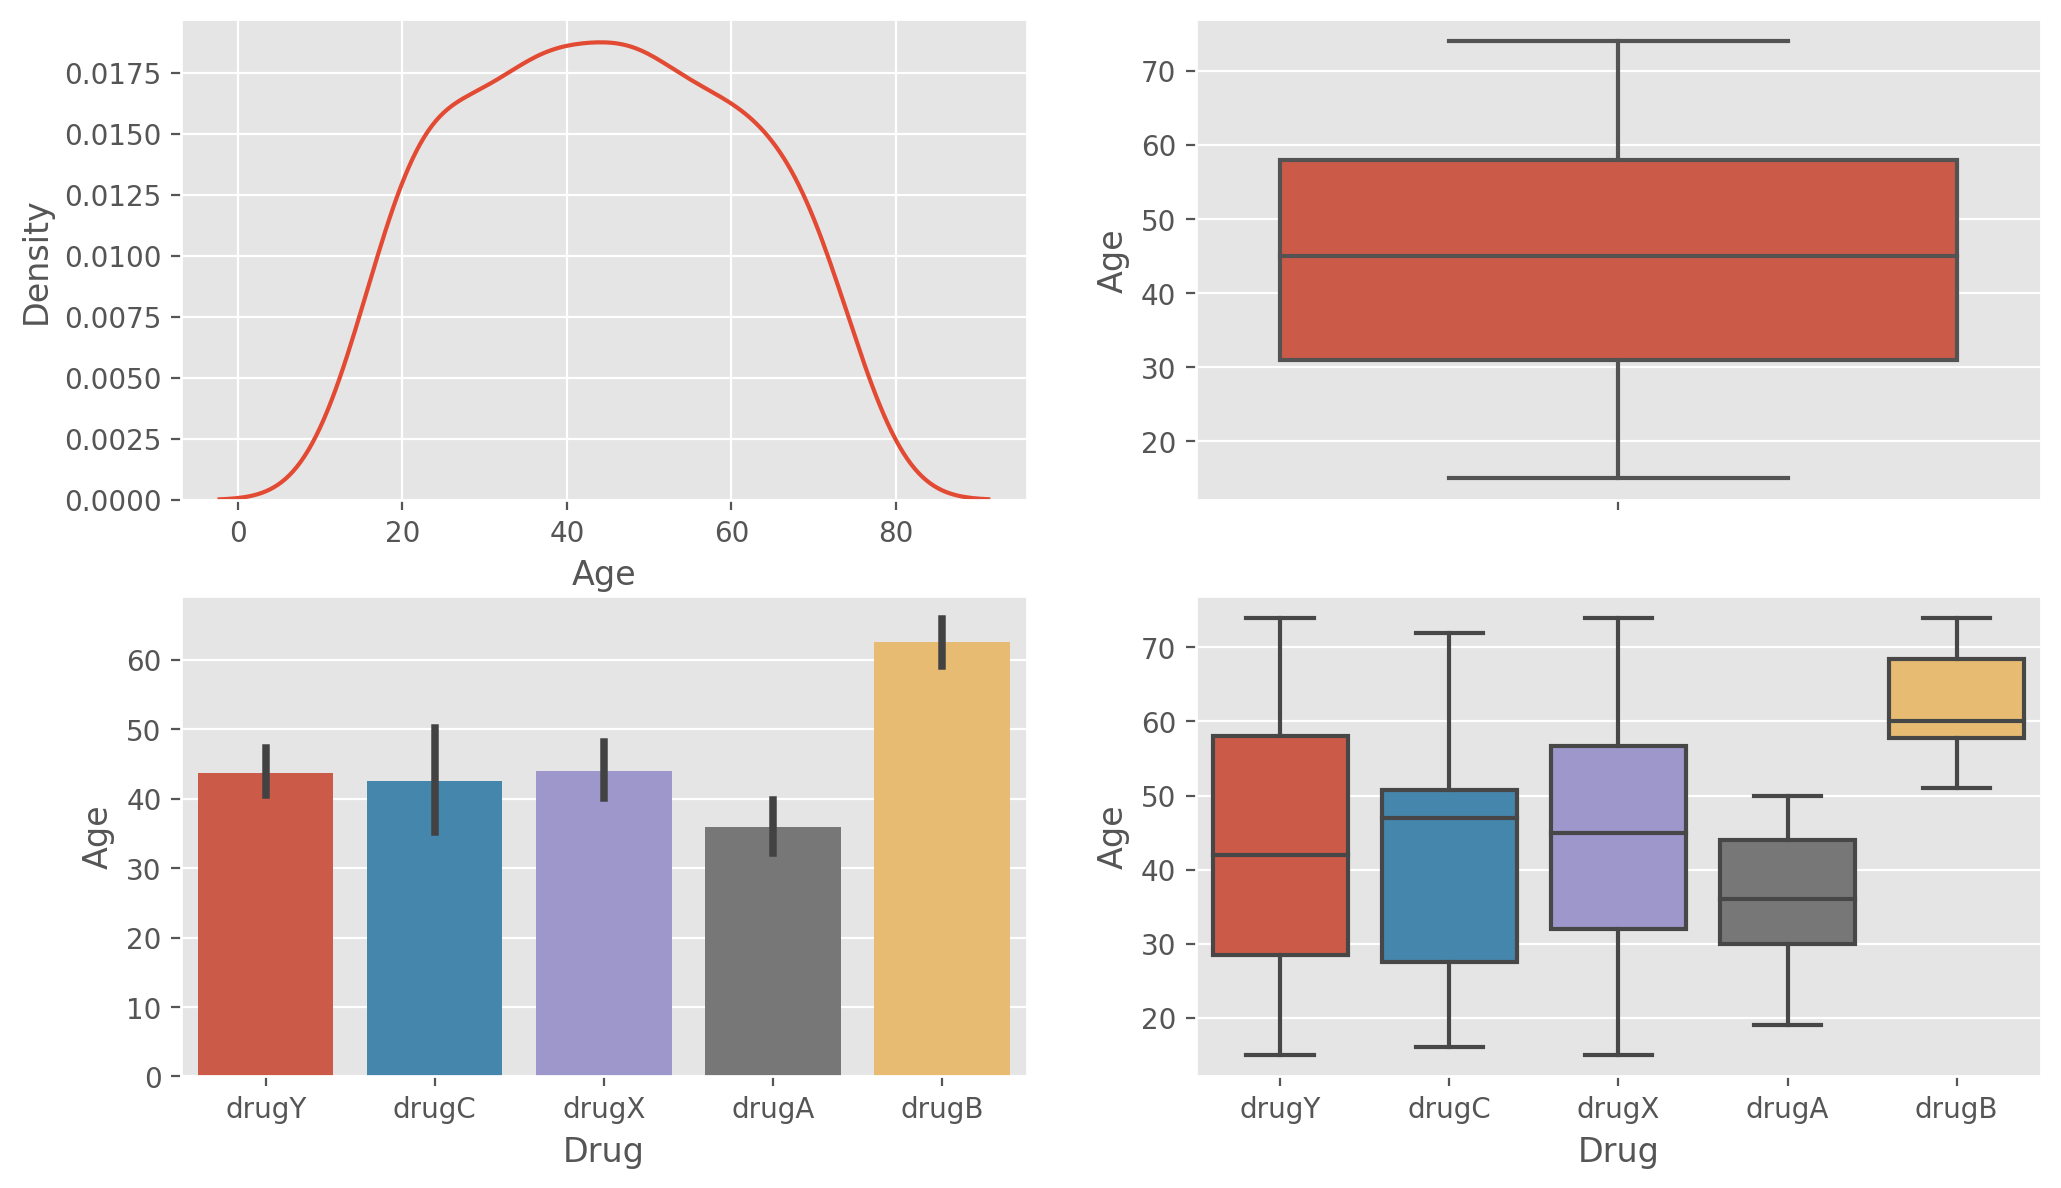

In [30]:
fig = plt.figure(figsize = (12,7), dpi = 200)

fig.add_subplot(2,2,1)
sns.distplot(data.Age, hist = False)

fig.add_subplot(2,2,2)
sns.boxplot(y = data.Age)

fig.add_subplot(2,2,3)
sns.barplot(data.Drug, data.Age)

fig.add_subplot(2,2,4)
sns.boxplot(data.Drug, data.Age)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

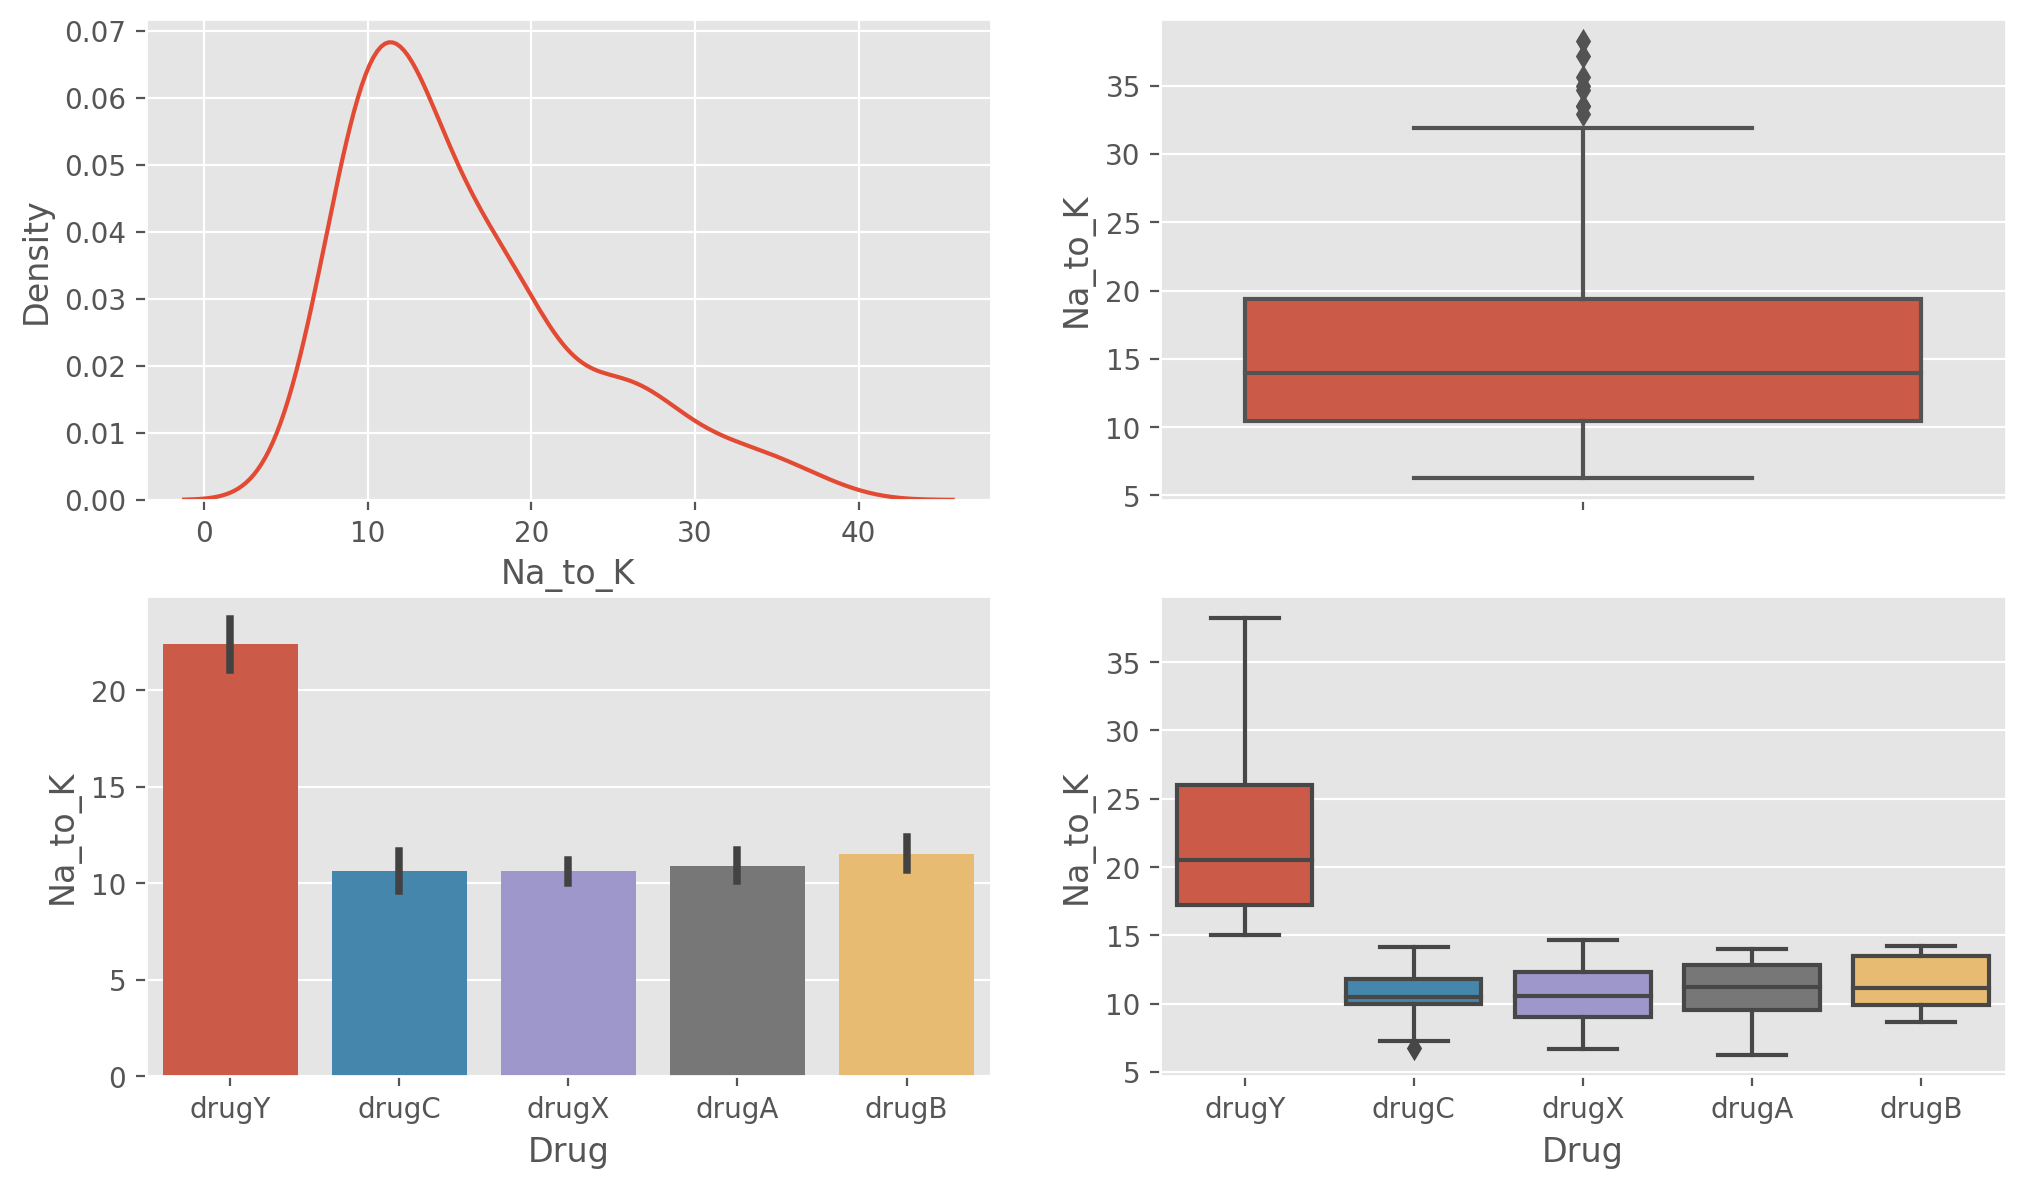

In [31]:
fig = plt.figure(figsize = (12,7), dpi = 200)

fig.add_subplot(2,2,1)
sns.distplot(data.Na_to_K, hist = False)

fig.add_subplot(2,2,2)
sns.boxplot(y = data.Na_to_K)

fig.add_subplot(2,2,3)
sns.barplot(data.Drug, data.Na_to_K)

fig.add_subplot(2,2,4)
sns.boxplot(data.Drug, data.Na_to_K)

<AxesSubplot:xlabel='Drug', ylabel='count'>

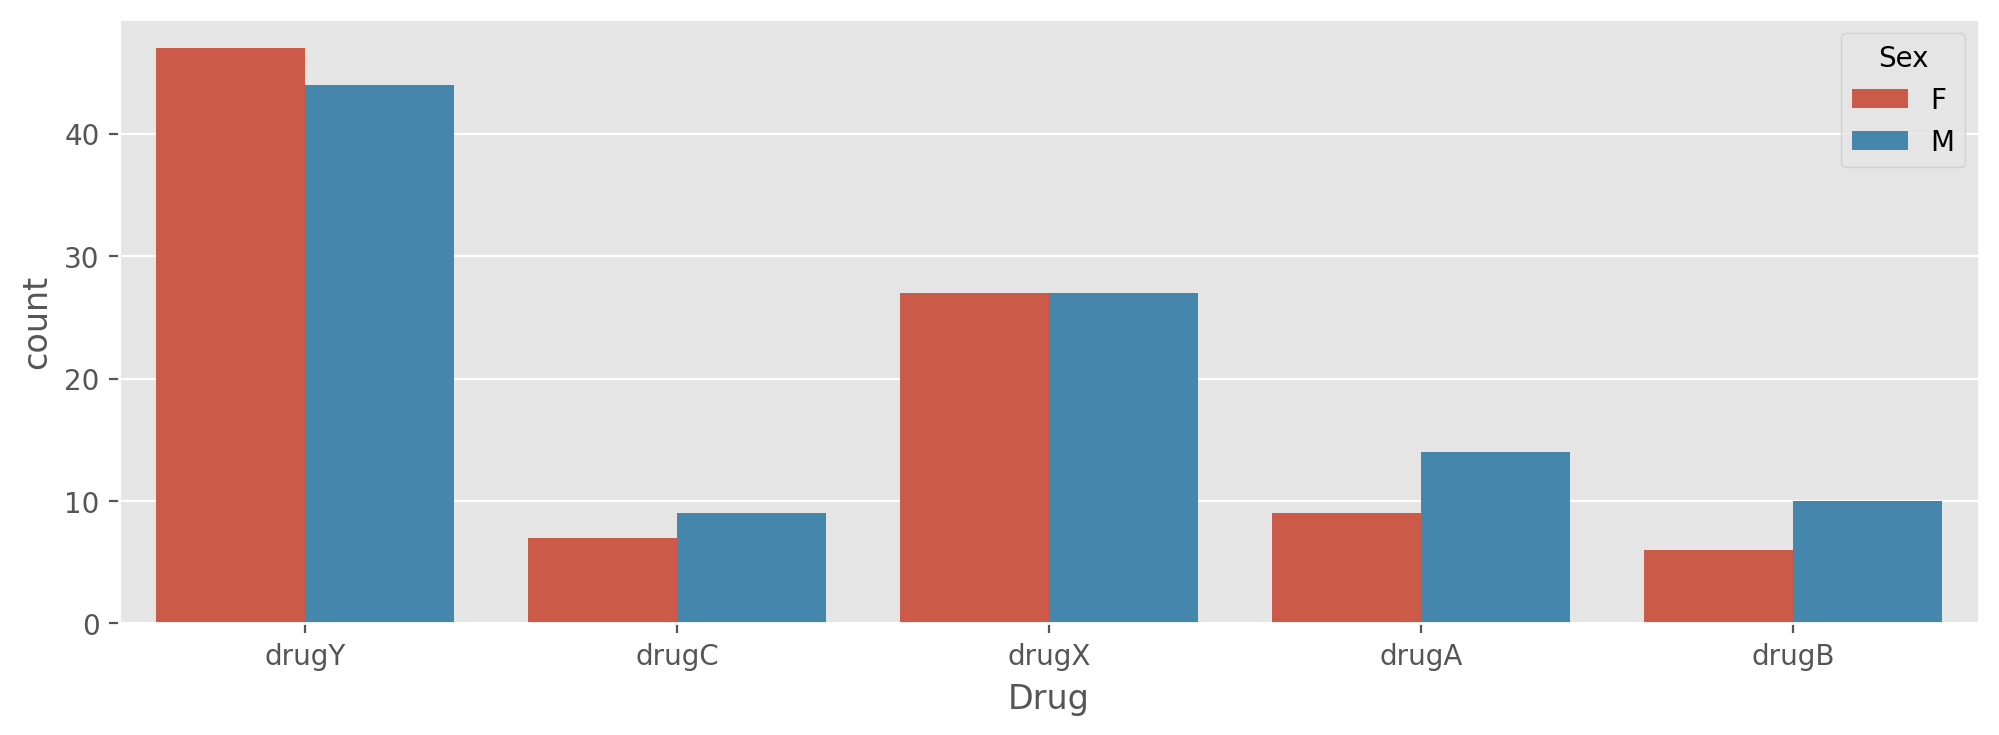

In [32]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data.Drug, hue = data.Sex )

<AxesSubplot:xlabel='Drug', ylabel='count'>

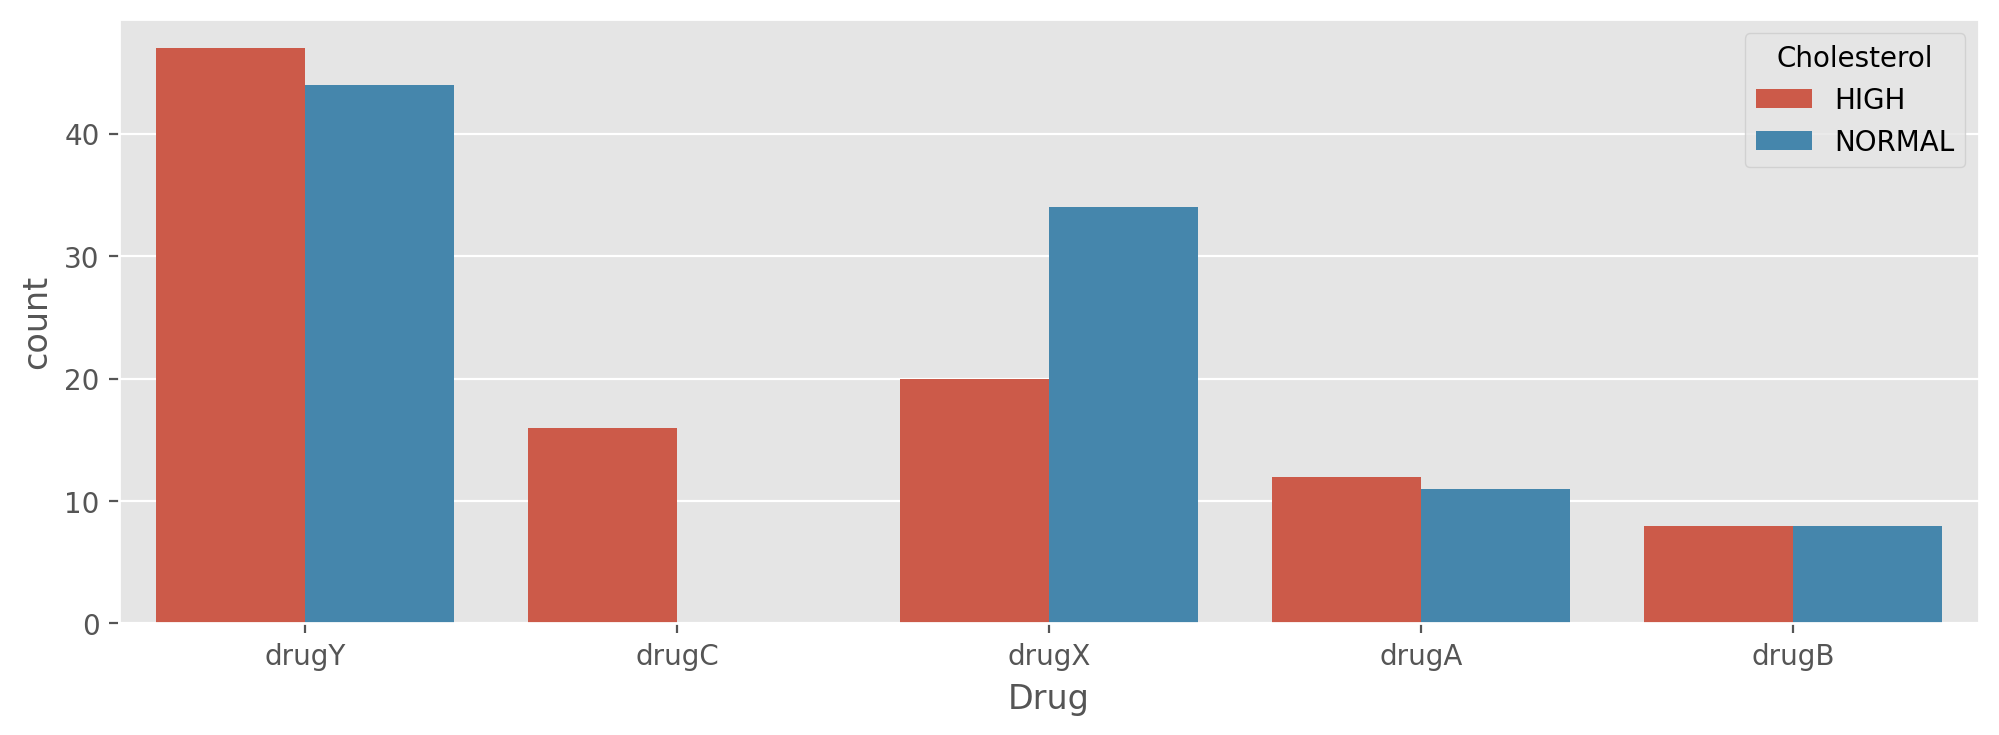

In [33]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data.Drug, hue = data.Cholesterol)

<AxesSubplot:xlabel='Drug', ylabel='count'>

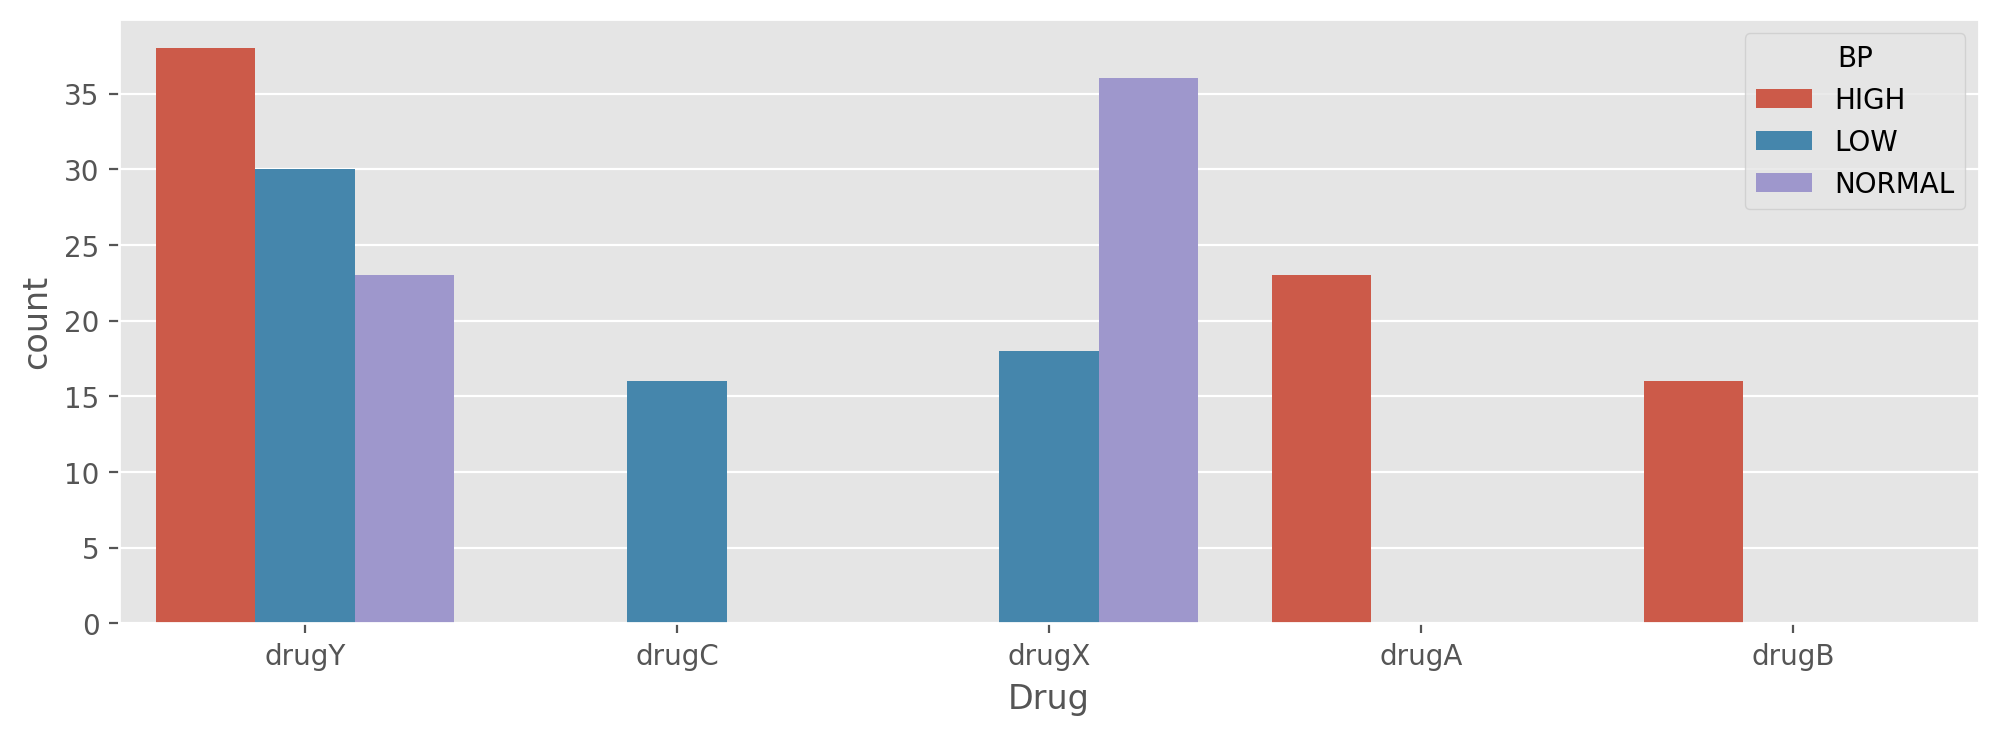

In [34]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data.Drug, hue = data.BP)

In [35]:
data.Sex = data.Sex.map({'F' : 1, 'M' : 0}).astype(int)
data.BP = data.BP.map({'LOW' : 0, 'NORMAL' : 1, 'HIGH' : 2}).astype(int)
data.Cholesterol = data.Cholesterol.map({'NORMAL' : 0, 'HIGH' : 1})

data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,drugY
1,47,0,0,1,13.093,drugC
2,47,0,0,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,0,1,18.043,drugY
5,22,1,1,1,8.607,drugX
6,49,1,1,1,16.275,drugY
7,41,0,0,1,11.037,drugC
8,60,0,1,1,15.171,drugY
9,43,0,0,0,19.368,drugY


In [36]:
cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = data[cols].values
Y = data[['Drug']].values

In [37]:
print(X[:5])
print('\n')
print(Y[:5])

[[23.     1.     2.     1.    25.355]
 [47.     0.     0.     1.    13.093]
 [47.     0.     0.     1.    10.114]
 [28.     1.     1.     1.     7.798]
 [61.     1.     0.     1.    18.043]]


[['drugY']
 ['drugC']
 ['drugC']
 ['drugX']
 ['drugY']]


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))

Training Accuracy :  0.83125
Testing Accuracy  :  0.825


## Effect of value of K (n_neighbors)
- When value of k is very low then we have a **Complex and inappropriate model** which leads to **Overfitting**
- When value of k is very high then we have an **Overly generalized model** which leads to **Underfitting**

In [44]:
# Very low value of K (n_neighbors)
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))

Training Accuracy :  1.0
Testing Accuracy  :  0.775


In [48]:
# Very high value of K (n_neighbors)
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))

Training Accuracy :  0.68125
Testing Accuracy  :  0.675


### Selecting Best Value

In [49]:
acc_train = []
acc_test = []

for i in range(1,16):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)

    y_pred_train = classifier.predict(x_train)
    y_pred_test = classifier.predict(x_test)

    acc_train.append(accuracy_score(y_train, y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))

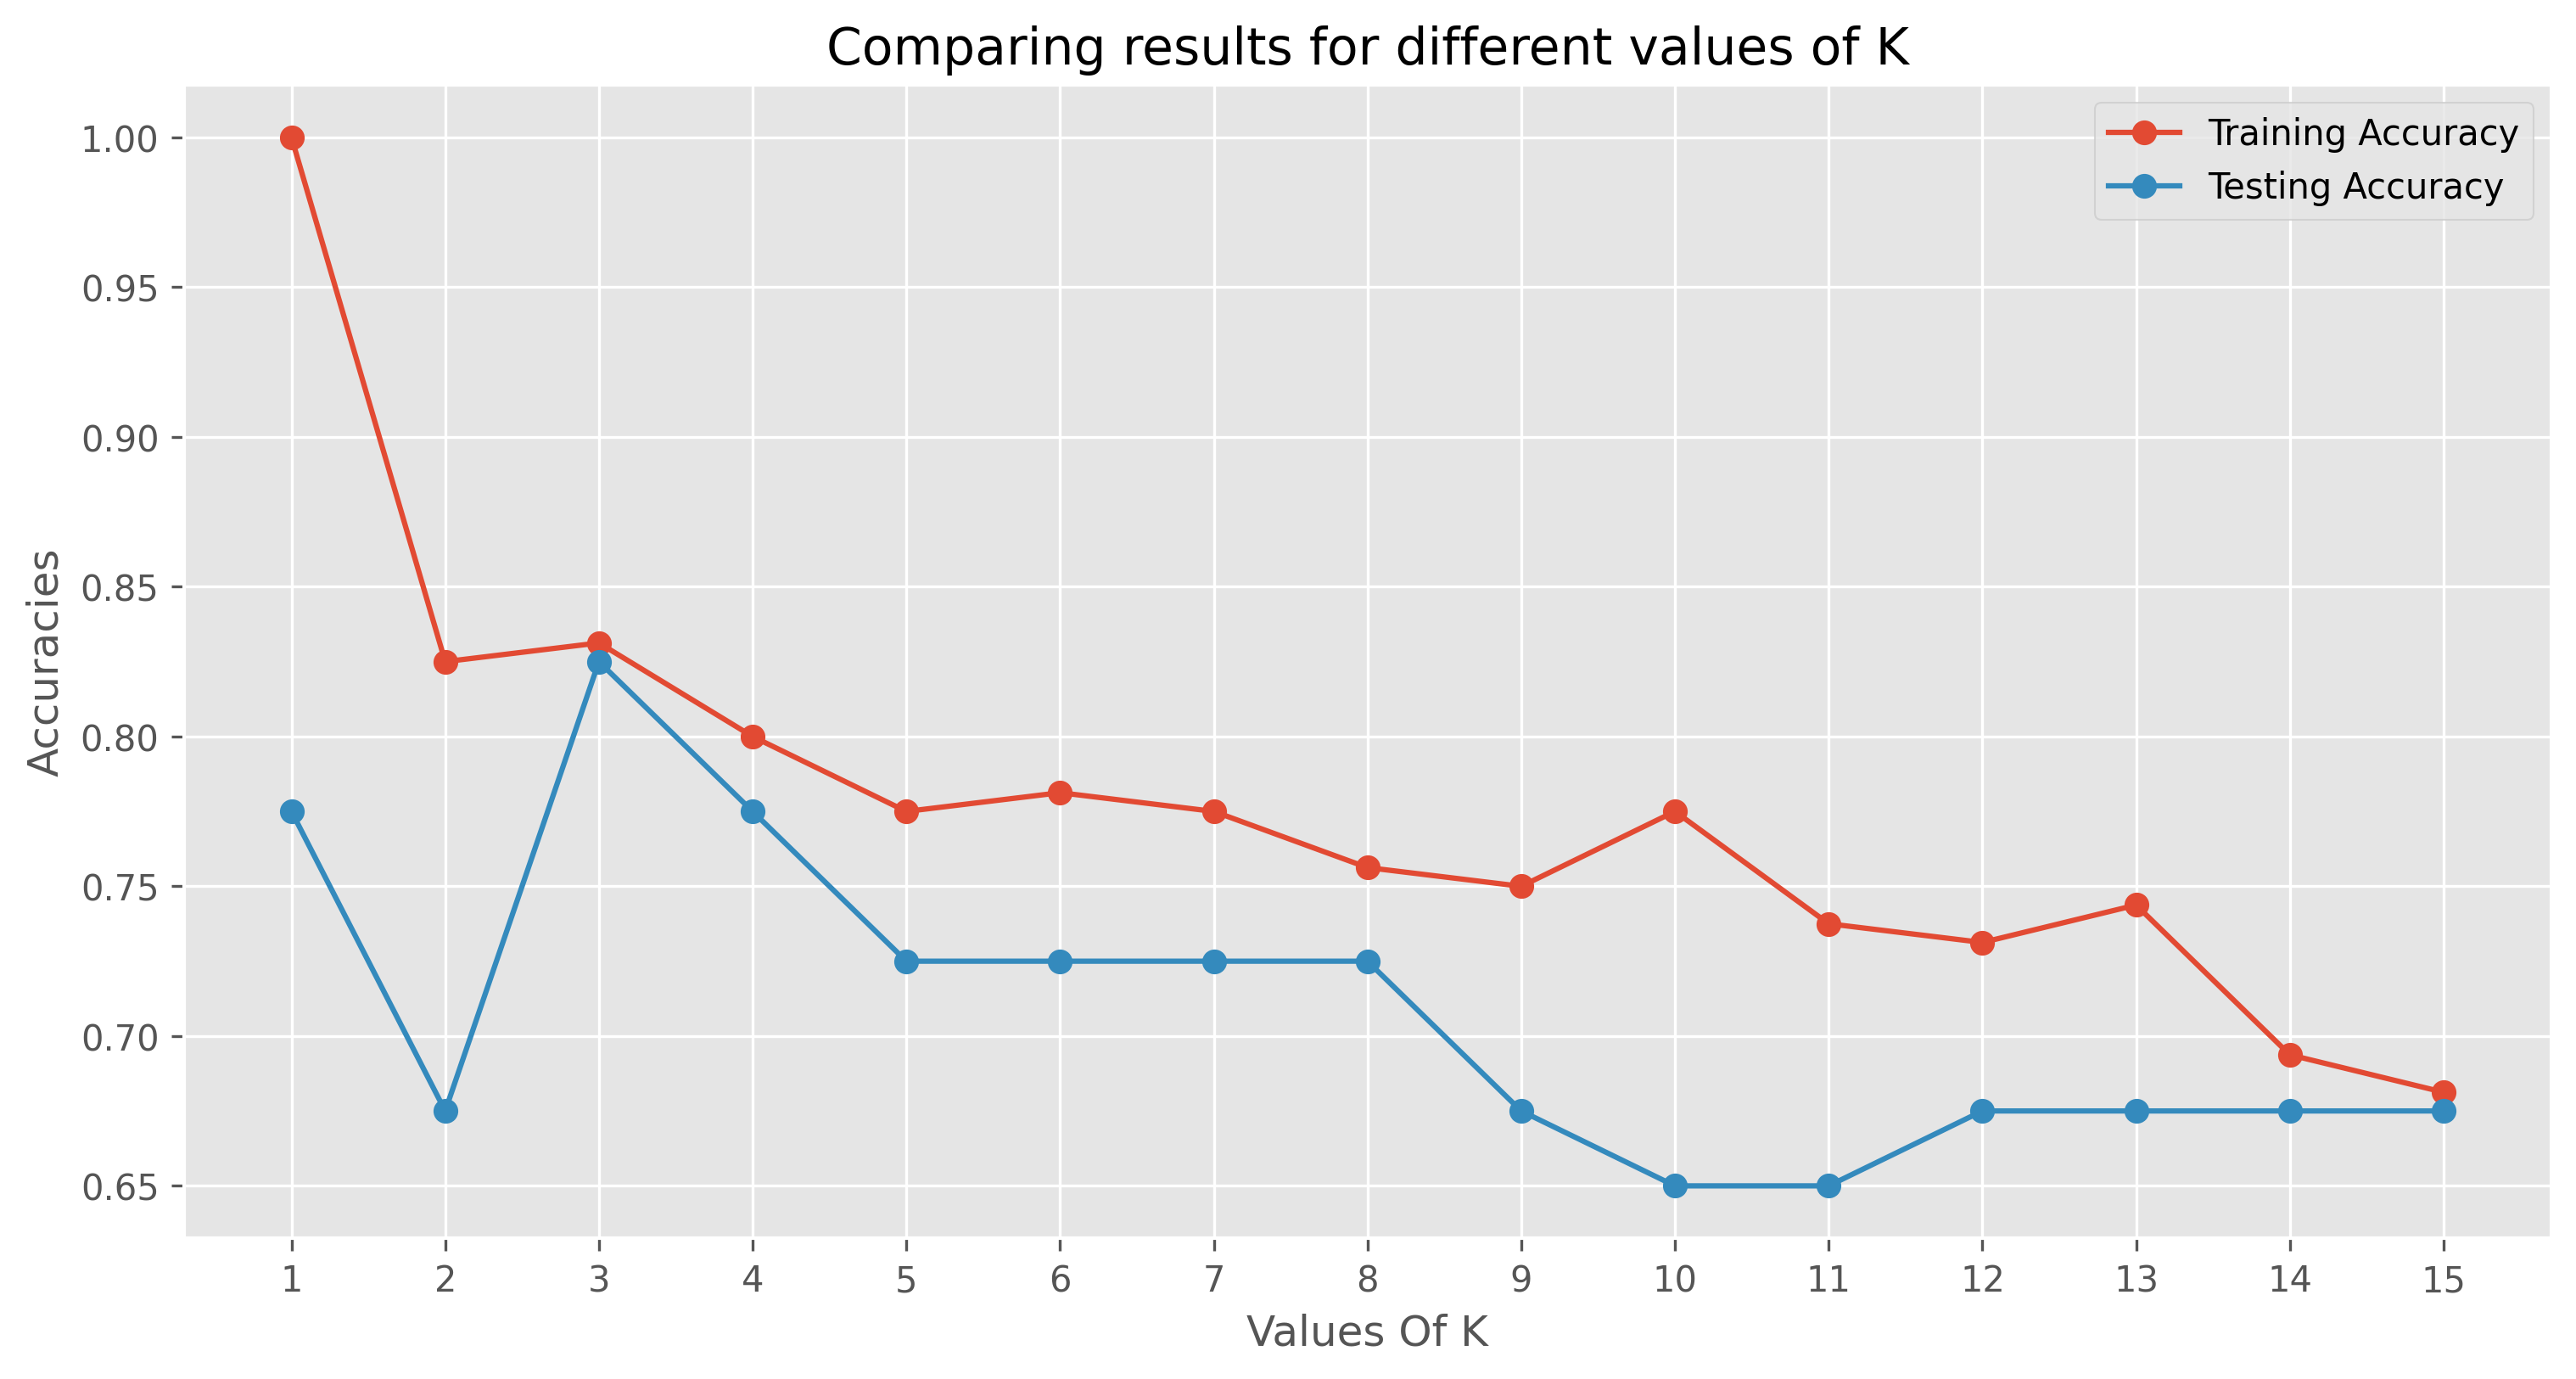

In [50]:
x = list(range(1,16))

plt.figure(figsize = (12,6), dpi = 300)
plt.plot(x, acc_train, '-o', label = 'Training Accuracy')
plt.plot(x, acc_test,  '-o', label = 'Testing Accuracy')

plt.xticks(x)
plt.xlabel('Values Of K')
plt.ylabel('Accuracies')
plt.title('Comparing results for different values of K')
plt.legend()

In [51]:
# Best Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)